In [103]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
import os
import glob

In [104]:
inputfolder = 'dataset/Cyst'
os.makedirs('resized dataset/Resized Folder 16x16/Cyst', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (16, 16))
    cv2.imwrite("resized dataset/Resized Folder 16x16/Cyst/Cyst- (%i).jpg" % i, imgResized)
    i += 1

In [105]:
inputfolder = 'dataset/Normal'
os.makedirs('resized dataset/Resized Folder 16x16/Normal', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (16, 16))
    cv2.imwrite("resized dataset/Resized Folder 16x16/Normal/Normal- (%i).jpg" % i, imgResized)
    i += 1

In [106]:
inputfolder = 'dataset/Stone'
os.makedirs('resized dataset/Resized Folder 16x16/Stone', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (16, 16))
    cv2.imwrite("resized dataset/Resized Folder 16x16/Stone/Stone- (%i).jpg" % i, imgResized)
    i += 1

In [107]:
inputfolder = 'dataset/Tumor'
os.makedirs('resized dataset/Resized Folder 16x16/Tumor', exist_ok=True)

i = 1

for img in glob.glob(inputfolder + "/*.jpg"):
    image = cv2.imread(img)
    imgResized = cv2.resize(image, (16, 16))
    cv2.imwrite("resized dataset/Resized Folder 16x16/Tumor/Tumor- (%i).jpg" % i, imgResized)
    i += 1

In [108]:
data_dir = Path('resized dataset/Resized Folder 16x16')
train_dir = data_dir

In [109]:
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [110]:
Normal_Cases = Normal_Cases_dir.glob('*.jpg') 
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg') 
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')

In [111]:
train_data = []

In [112]:
for img in Cyst_Cases:
    train_data.append((img, 0))

for img in Normal_Cases:
    train_data.append((img, 1))

for img in Stone_Cases:
    train_data.append((img, 2))

for img in Tumor_Cases:
    train_data.append((img, 3))

In [113]:
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)
train_data

,image,label
0,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
1,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
2,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
3,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
4,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
...,...,...
12441,resized dataset/Resized Folder 16x16/Tumor/Tum...,3
12442,resized dataset/Resized Folder 16x16/Tumor/Tum...,3
12443,resized dataset/Resized Folder 16x16/Tumor/Tum...,3
12444,resized dataset/Resized Folder 16x16/Tumor/Tum...,3


In [114]:
train_data = train_data.sample(frac=1.).reset_index(drop=True) 
train_data.head()

,image,label
0,resized dataset/Resized Folder 16x16/Tumor/Tum...,3
1,resized dataset/Resized Folder 16x16/Stone/Sto...,2
2,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
3,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0
4,resized dataset/Resized Folder 16x16/Cyst/Cyst...,0


In [115]:
train_data['label'].unique()

array([3, 2, 0, 1])

In [116]:
train_data.shape

(12446, 2)

In [117]:
cases_count = train_data['label'].value_counts()
cases_count

label
1    5077
0    3709
3    2283
2    1377
Name: count, dtype: int64

/var/folders/m4/0yq10js97k90dzpb9_y3tfzc0000gn/T/ipykernel_27774/707280772.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cases_count.index, y = cases_count.values, palette='bright', edgecolor='black')


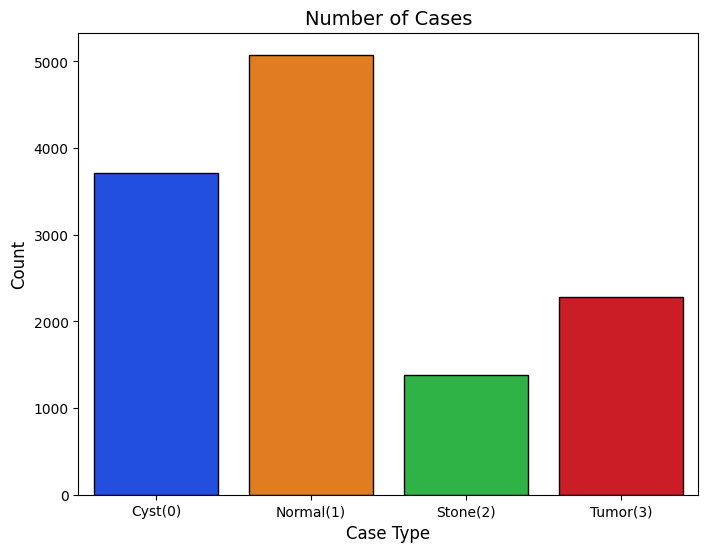

In [118]:
plt.figure(figsize = (8,6))
sns.barplot(x = cases_count.index, y = cases_count.values, palette='bright', edgecolor='black')
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

In [119]:
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()


samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples



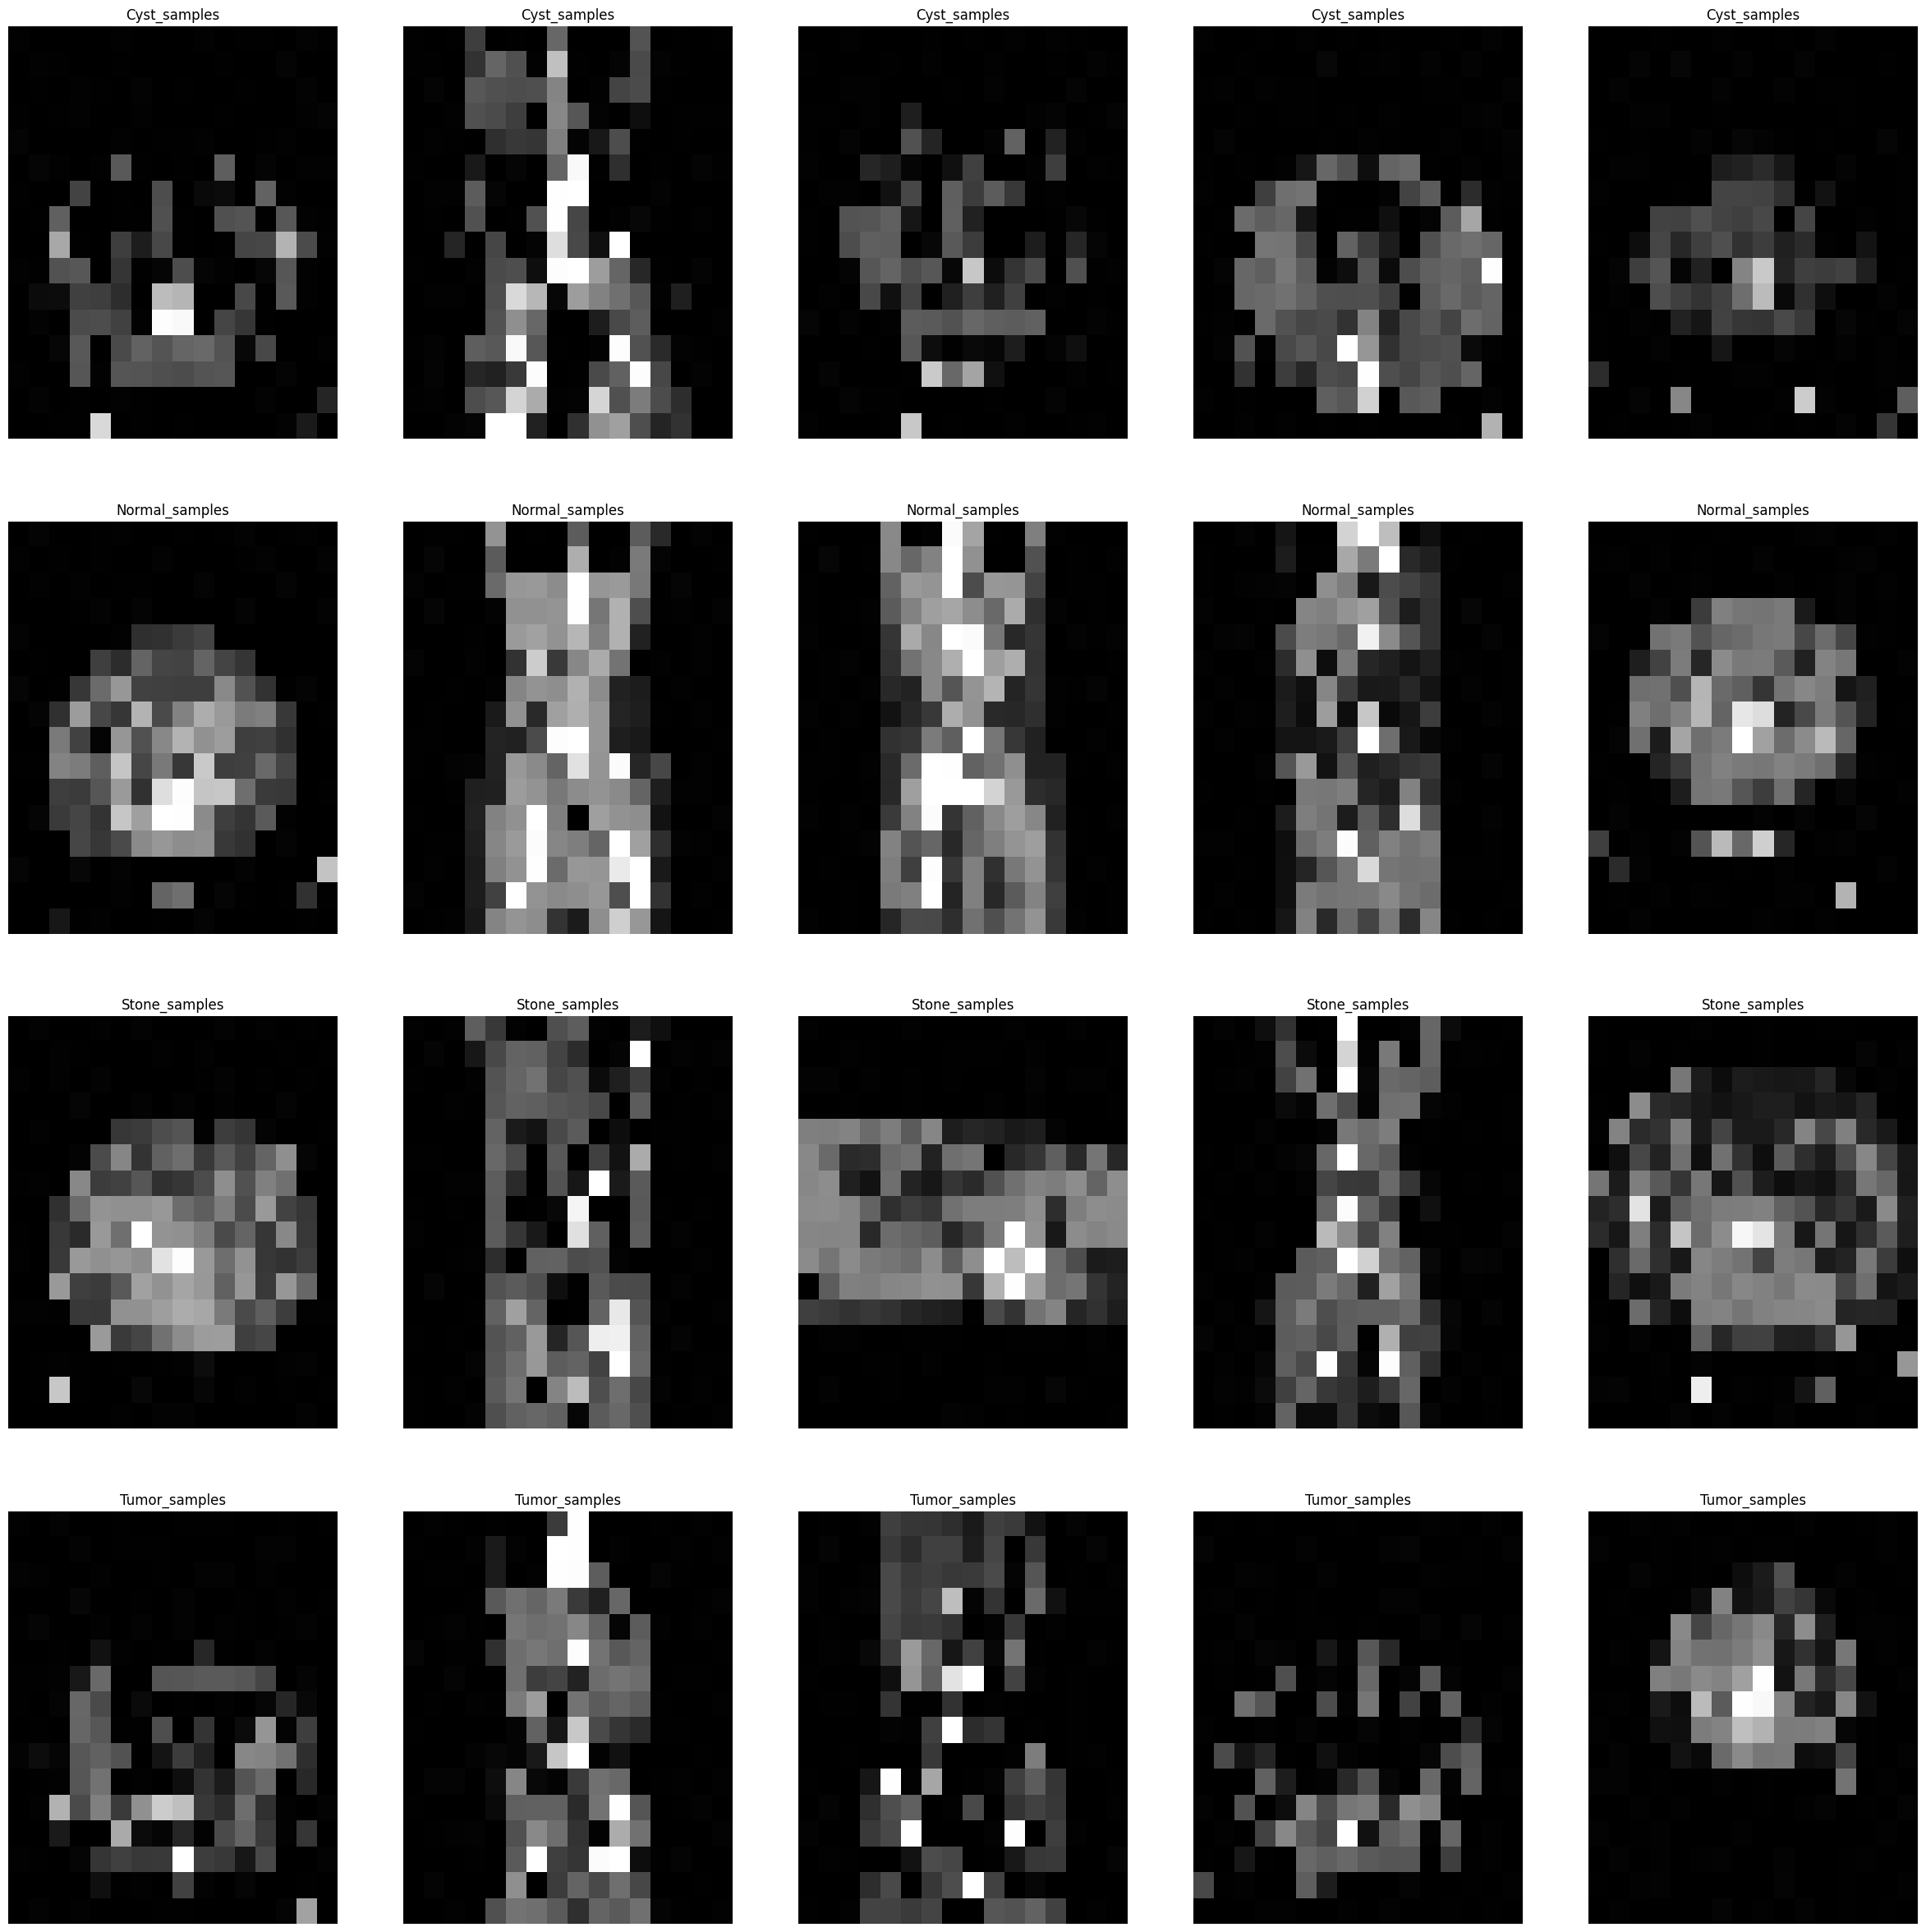

In [120]:
f, ax = plt.subplots(4, 5,figsize=(30,30)) 

for i in range(20):
    img = imread(samples[i]) 
    ax[i//5, i%5].imshow(img, cmap='gray') 
    

    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
 
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()
    

In [121]:

Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [122]:
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

In [123]:

for img in Cyst_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1: 
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    img = np.array(img)
    img = img/255  
    label = 'Cyst' 
    train_data.append(img)
    train_labels.append(label)

In [124]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [125]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [126]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [127]:
train_data1 = np.array(train_data) 
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (12446, 16, 16, 3)
Total number of Labels :  (12446,)


In [ ]:
train_data1[1]

In [129]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst
...,...
12441,Tumor
12442,Tumor
12443,Tumor
12444,Tumor


In [130]:
train_labels1['label'].unique()

array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [131]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [132]:
train_labels1

,label
0,0
1,0
2,0
3,0
4,0
...,...
12441,3
12442,3
12443,3
12444,3


In [133]:
print(train_data1.shape)
print(train_labels1.shape)

(12446, 16, 16, 3)
(12446, 1)


In [134]:
train_labels1.isnull().sum()

label    0
dtype: int64

In [135]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming train_data1 is your original dataset
# Assuming train_labels1 is your corresponding labels

# Create a subset of the data
subset_fraction = 0.1  # 10% of the data
subset_data, _, subset_labels, _ = train_test_split(
    train_data1, train_labels1, test_size=(1 - subset_fraction), random_state=42
)

# Reshape the subset data if needed
subset_rows = len(subset_data)
subset_data = subset_data.reshape(subset_rows, -1)

# Apply SMOTE to the subset
smote = SMOTE()
subset_data_resampled, subset_labels_resampled = smote.fit_resample(subset_data, subset_labels)

# Reshape the resampled data back to the original shape if needed
subset_data_resampled = subset_data_resampled.reshape(subset_data_resampled.shape[0], 16, 16, 3)

# Print the shapes to check
print("Original subset data shape:", subset_data.shape)
print("Resampled subset data shape:", subset_data_resampled.shape)
print("Resampled subset labels shape:", subset_labels_resampled.shape)


Original subset data shape: (1244, 768)
Resampled subset data shape: (2092, 16, 16, 3)
Resampled subset labels shape: (2092, 1)


/var/folders/m4/0yq10js97k90dzpb9_y3tfzc0000gn/T/ipykernel_27774/1410693467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cases_count1.index, y=cases_count1.values, palette='bright', edgecolor='black')


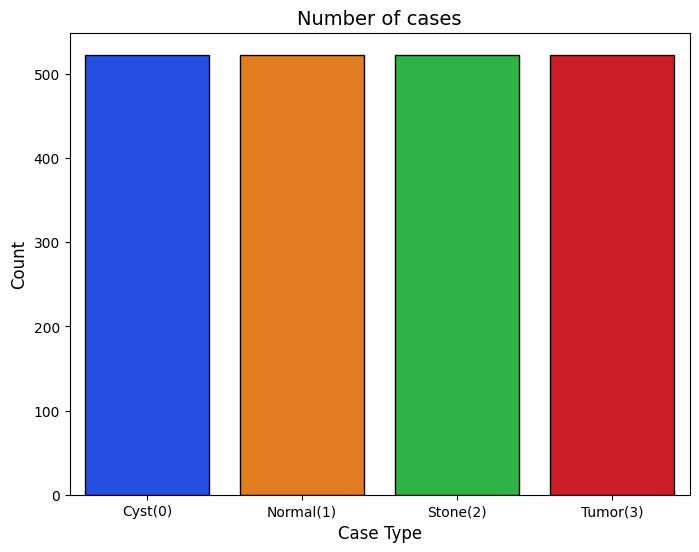

In [136]:
cases_count1 = subset_labels_resampled['label'].value_counts() 

plt.figure(figsize=(8,6)) 
sns.barplot(x=cases_count1.index, y=cases_count1.values, palette='bright', edgecolor='black')
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [137]:
subset_data_resampled.shape

(2092, 16, 16, 3)

In [138]:
train_data2 = subset_data_resampled.reshape(-1,16,16,3) # Converting 2D array to 4D Array
train_data2.shape


(2092, 16, 16, 3)

In [ ]:
train_data

In [140]:
from sklearn.model_selection import train_test_split

subset_size = 1000  # Adjust the size based on your available memory
X_train, X_test, y_train, y_test = train_test_split(train_data2[:subset_size], subset_labels_resampled[:subset_size], test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [141]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (720, 16, 16, 3)
Testing Data X :  (200, 16, 16, 3)
Training Data y :  (720, 1)
Testing Data y :  (200, 1)
Validating Data X :  (80, 16, 16, 3)
Validating Data y (80, 1)
Image Size :  (16, 16, 3)


In [142]:
import tensorflow as tf
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30, 
                    horizontal_flip=True)

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(16, 16, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 


 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                8224      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 47076 (183.89 KB)
Trainable params: 47076 (183.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10


23/23 [==============================] - 0s 6ms/step - loss: 1.2206 - accuracy: 0.4486 - val_loss: 1.0624 - val_accuracy: 0.6000
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 1.0260 - accuracy: 0.6181 - val_loss: 0.9215 - val_accuracy: 0.6125
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.9553 - accuracy: 0.6306 - val_loss: 0.8714 - val_accuracy: 0.7000
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.8813 - accuracy: 0.6556 - val_loss: 0.9056 - val_accuracy: 0.6500
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.6889 - val_loss: 0.7929 - val_accuracy: 0.7375
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.7445 - accuracy: 0.7278 - val_loss: 0.7603 - val_accuracy: 0.7125
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.7224 - accuracy: 0.7153 - val_loss: 0.7406 - val_accuracy: 0.7375
Epoch 8/10
23/23 [=============

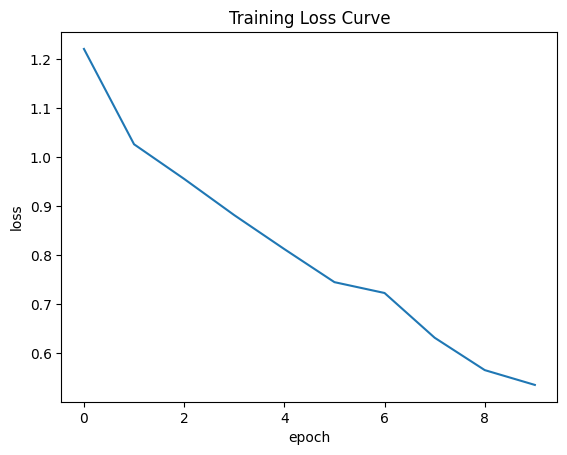

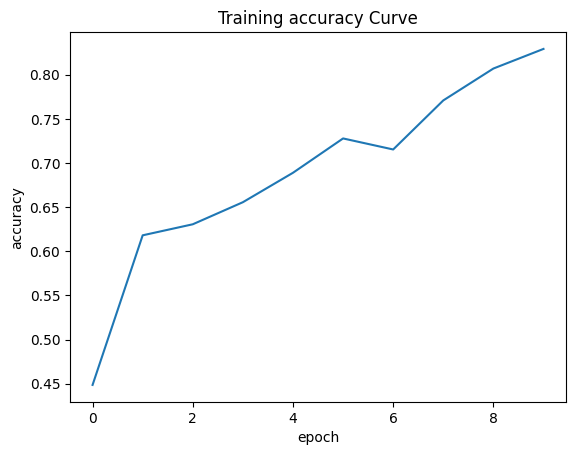

In [144]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_val), np.array(y_val)))

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [145]:

a = model.predict(X_test)
print(a)

7/7 [==============================] - 0s 1ms/step
[[5.75317860e-01 7.23391771e-02 1.56131342e-01 1.96211606e-01]
 [3.93957794e-01 7.09626898e-02 1.18915796e-01 4.16163713e-01]
 [1.01462090e-02 7.04991758e-01 1.20674789e-01 1.64187327e-01]
 [5.48678279e-01 1.49766997e-01 1.35960877e-01 1.65593877e-01]
 [8.68786156e-01 1.16426963e-02 6.71478137e-02 5.24233356e-02]
 [9.83876176e-04 5.96053541e-01 4.15527187e-02 3.61409843e-01]
 [2.31903289e-02 5.12766659e-01 1.12205006e-01 3.51837963e-01]
 [5.00698209e-01 3.22348401e-02 1.16618641e-01 3.50448340e-01]
 [6.67510927e-01 8.10762271e-02 1.62115589e-01 8.92971978e-02]
 [1.20672798e-02 8.30183923e-02 6.25366122e-02 8.42377722e-01]
 [2.13623769e-03 6.14788651e-01 1.65387187e-02 3.66536409e-01]
 [8.88509631e-01 7.41458451e-03 2.15303227e-02 8.25453550e-02]
 [1.64379478e-01 3.85777622e-01 1.54172376e-01 2.95670539e-01]
 [8.14377308e-01 1.26495445e-02 6.09748363e-02 1.11998364e-01]
 [1.20456070e-02 6.69728100e-01 1.37167707e-01 1.81058645e-01]
 [5.

In [146]:
b = []

for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[0, 3, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 1, 1, 3, 0, 3, 0, 3, 3, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 3, 0, 1, 3, 1, 0, 0, 1, 1, 0, 1, 1, 3, 1, 3, 1, 1, 0, 3, 3, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 0, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 3, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 3, 1, 3, 3, 0, 1, 3, 3, 1, 0, 1, 3, 1, 0, 3, 3, 3, 1, 1, 3, 0, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 0, 0, 0, 0, 0, 1, 3, 1, 3, 1, 0, 3, 1, 1, 0, 0]


In [147]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  0.76


Confusion Matrix : 

 [[55  1  0  4]
 [ 2 72  0  9]
 [ 5  7  1  6]
 [ 4 10  0 24]]


[Text(0, 0.5, 'Cyst'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

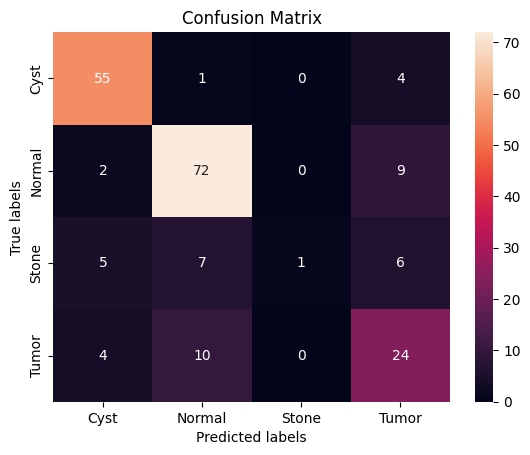

In [148]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor']) 
ax.yaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])

In [149]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))


F1 Score is : 0.76


In [150]:
pic = []
image='resized dataset/Resized Folder 16x16/Cyst/Cyst- (1052).jpg'
img = cv2.imread(str(image))

In [151]:
pic.append(img)
pic1 = np.array(pic)

In [152]:
a = model.predict(pic1)

1/1 [==============================] - 0s 28ms/step


In [153]:
if a.argmax() == 0 :
    print("The detected disease is \"Cyst\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Stone\"")
else:
    print("The detected disease is \"Tumor\"")

Kidney is "Normal" 
